# 1.Use MNIST dataset to train our model using handwritten recognition.

Make sure to install cv2 and tensorflow libraries before importing!!!

In [19]:
#Import all the libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [20]:
# import our dataset using tensorflow
mnist = tf.keras.datasets.mnist

### Preprocessing

In [21]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [22]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [23]:
def createModel(hiddenLayers=[128, 128], dropoutRate=0, activation='relu', optimizer='adam',
                loss='sparse_categorical_crossentropy', metrics=['accuracy']):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(28, 28)))
    model.add(tf.keras.layers.Flatten())
    # Creating hidden layers
    for count in hiddenLayers:
        model.add(tf.keras.layers.Dense(count, activation=activation))
        model.add(tf.keras.layers.Dropout(dropoutRate))
    
    # Output layer with 10 neurons
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    return model

In [24]:
model = createModel(hiddenLayers=[96, 32], dropoutRate=0)

# Works better on handwritten digits, but takes longer to train
# model = createModel(hiddenLayers=[512, 256, 128, 64, 32, 16])

### Determine optimal hyperparameters

In [25]:
# from sklearn.model_selection import GridSearchCV
# from scikeras.wrappers import KerasClassifier
# param_grid = {
#     'epochs': [1, 2, 3],
#     'hiddenLayers': [
#         [4, 2], [16, 16]
#     ]
# }

# grid = GridSearchCV(estimator=KerasClassifier(model=createModel, hiddenLayers=[], epochs=0), param_grid=param_grid, scoring="accuracy")

# grid_result = grid.fit(x_train, y_train)
# print("Best parameters: ", grid_result.best_params_)
# print("Best accuracy: {:.2f}%".format(grid_result.best_score_ * 100))

### Training the model with a set seed

In [26]:
# Funney
seed = hash("Group6TheBest") % (10**9 + 7)
tf.random.set_seed(seed)
np.random.seed(seed)

model.fit(x_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3189 - accuracy: 0.9104
Epoch 2/6
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1431 - accuracy: 0.9583
Epoch 3/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1007 - accuracy: 0.9695
Epoch 4/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0777 - accuracy: 0.9763
Epoch 5/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0612 - accuracy: 0.9809
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0493 - accuracy: 0.9854


In [27]:
model.save('handwritten.model')

In [28]:
# model = tf.keras.models.load_model('handwritten.model')
# model = tf.keras.models.load_model('handwritten.model', compile=False) 

In [29]:
# model.compile()

In [30]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0998 - accuracy: 0.9697


In [31]:
print(loss)
print(accuracy)

0.09979189187288284
0.9696999788284302


## Testing it with my own handwritten numbers

Processing: jason_digits/digit0.png
1/1 [==============================] - 0s 107ms/step
This digit is probably a 0


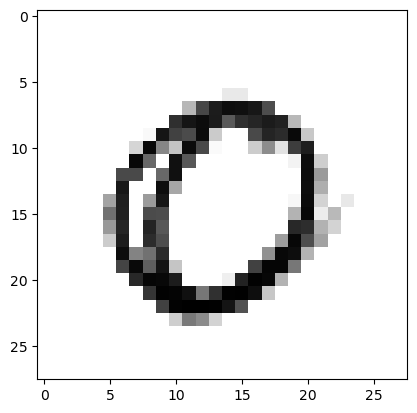

Processing: jason_digits/digit1.png
1/1 [==============================] - 0s 20ms/step
This digit is probably a 1


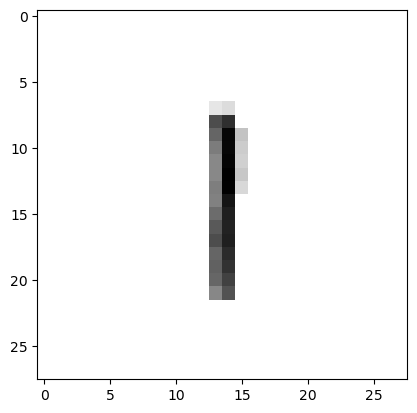

Processing: jason_digits/digit2.png
1/1 [==============================] - 0s 38ms/step
This digit is probably a 2


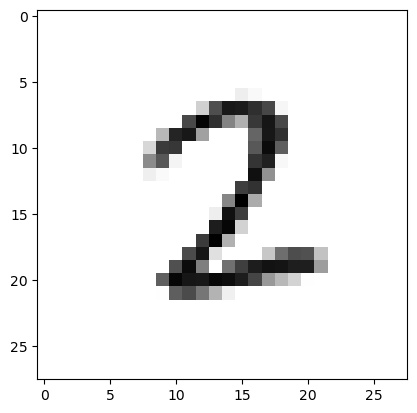

Processing: jason_digits/digit3.png
1/1 [==============================] - 0s 20ms/step
This digit is probably a 3


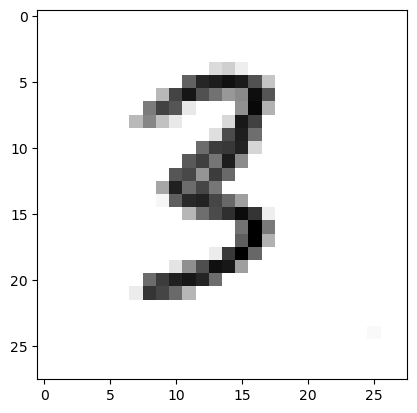

Processing: jason_digits/digit4.png
1/1 [==============================] - 0s 18ms/step
This digit is probably a 4


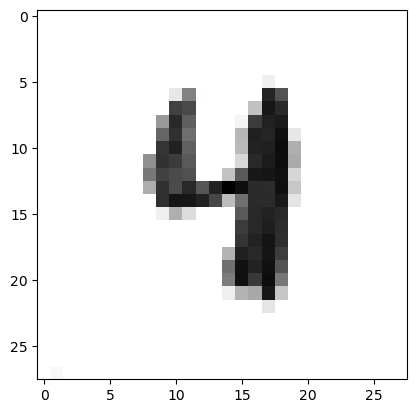

Processing: jason_digits/digit5.png
1/1 [==============================] - 0s 30ms/step
This digit is probably a 8


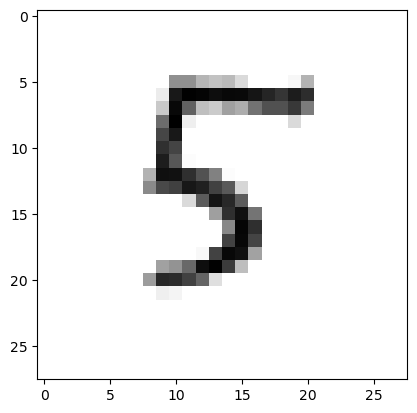

Processing: jason_digits/digit6.png
1/1 [==============================] - 0s 19ms/step
This digit is probably a 6


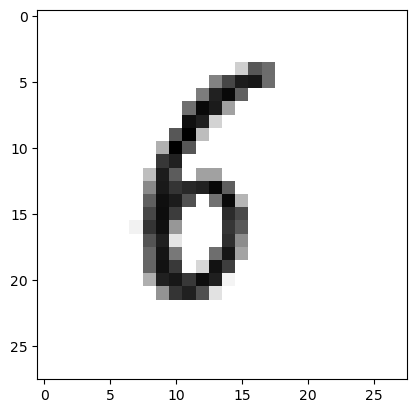

Processing: jason_digits/digit7.png
1/1 [==============================] - 0s 18ms/step
This digit is probably a 7


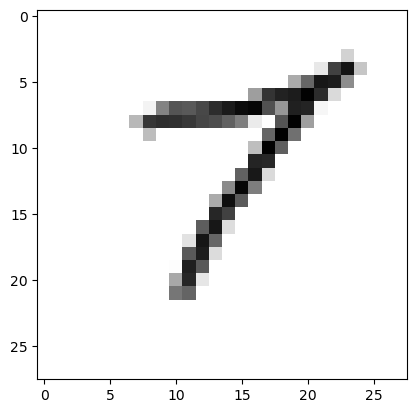

Processing: jason_digits/digit8.png
1/1 [==============================] - 0s 20ms/step
This digit is probably a 8


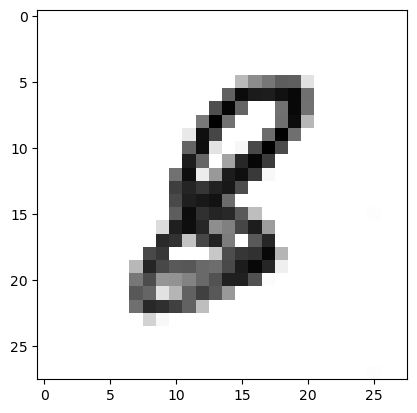

Processing: jason_digits/digit9.png
1/1 [==============================] - 0s 19ms/step
This digit is probably a 1


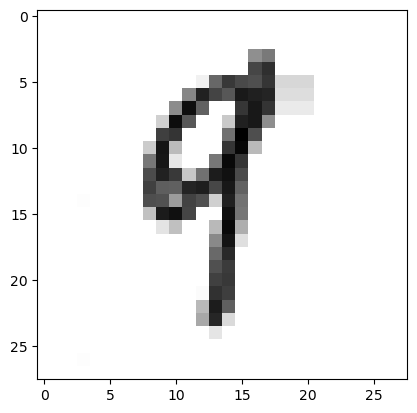

In [32]:
image_number = 1

# Enable interactive mode for matplotlib
plt.ion()

image_number = 0
# folder_name = "digits_samples"
folder_name = "jason_digits"

while os.path.isfile(f"{folder_name}/digit{image_number}.png"):
    try:
        # Debugging statement
        print(f"Processing: {folder_name}/digit{image_number}.png")
        
        img = cv2.imread(f"{folder_name}/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        
        # Ensure the image is correctly read and processed
        if img is not None:
            prediction = model.predict(img)
            print(f"This digit is probably a {np.argmax(prediction)}")
            plt.imshow(img[0], cmap=plt.cm.binary)
            plt.show()
        else:
            print(f"Failed to load image {folder_name}/digit{image_number}.png")
            
    except Exception as e:
        print(f"Error: {e}")
    finally:
        image_number += 1

# Turn off interactive mode
plt.ioff()

### Parse some expression

In [33]:
import cv2
import numpy as np
dim = 28

def isEmpty(imgBin):
    imgBin = imgBin[0]
    for row in imgBin:
        if row.tolist().count(0)!=dim: return False
    return True
    
def splitExpression(path="expression.png", verbose=False, displayOrig=True):
    img = cv2.imread(path)[:,:,0]
    divs = img.shape[1]//dim

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    res = []
    for i in range(divs):
        sub = img[1:dim+1, i*29+1:i*29+1+dim]
        sub = np.invert(np.array([sub]))
        
        if isEmpty(sub): break

        res.append(sub)
        if verbose:
            plt.imshow(sub[0], cmap=plt.cm.binary)
            plt.show()
    return res

def getToken(img, verbose=False):
    return str(np.argmax(model.predict(img, verbose=verbose)))

def parseExpression(path="expression.png", verbose=False, displayOrig=True):
    images = splitExpression(path=path, verbose=verbose)
    return "".join(map(getToken, images))

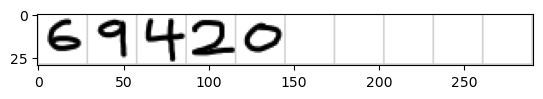

63520


In [34]:
print(parseExpression(verbose=0))

### eval() Demo

In [35]:
eval("13*52//(10*12+69-20)")

4

In [36]:
# Jason's 20 x 16 dataset

dim = 28
    
def getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True):
    img = cv2.imread(path)[:,:,0]

    if displayOrig:
        temp = np.invert(np.array([img]))
        plt.imshow(temp[0], cmap=plt.cm.binary)
        plt.show()
    
    resInput = [None]*16
    for row in range(16):
        cur = [None]*20
        for col in range(20):
            sub = img[row*29+1:row*29+29, col*29+1:col*29+29]
            sub = np.invert(np.array([sub]))
    
            cur[col]=sub
            if verbose:
                plt.imshow(sub[0], cmap=plt.cm.binary)
                plt.show()
        resInput[row] = cur

    resOutput = [None]*(20*16)
    for i in range(16):
        output = [0] * 16
        output[i]=1
        for idx in range(i*20, i*20+20):
            resOutput[idx]=output
    return resInput, resOutput
# getHandwrittenData()

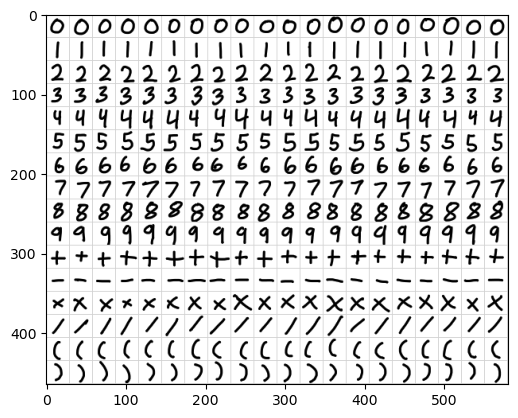

In [37]:
resInput, resOutput = getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=True)


In [42]:
resOutput

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
resInput

array([[[[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],


        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],


        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],


        ...,


        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]]],


        [[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],

In [40]:
# Reshape the input data if necessary (e.g., for TensorFlow compatibility)
resInput = resInput.reshape(-1, 28, 28, 1)  # Assuming each image is 28x28 pixels


array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [44]:

resInput, resOutput = getHandwrittenData(path="handwritten_training_data.png", verbose=False, displayOrig=False)

resInput = np.array(resInput)
resOutput = np.array(resOutput)


resInput = resInput.reshape(-1, 28, 28, 1)


model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(96, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(resInput, resOutput, epochs=10, validation_split=0.2)



Epoch 1/10
8/8 [==============================] - 0s 27ms/step - loss: 69.0087 - accuracy: 0.0938 - val_loss: 45.1478 - val_accuracy: 0.0000e+00
Epoch 2/10
8/8 [==============================] - 0s 10ms/step - loss: 9.0345 - accuracy: 0.2500 - val_loss: 26.3343 - val_accuracy: 0.0156
Epoch 3/10
8/8 [==============================] - 0s 10ms/step - loss: 2.5535 - accuracy: 0.3320 - val_loss: 17.8351 - val_accuracy: 0.0000e+00
Epoch 4/10
8/8 [==============================] - 0s 11ms/step - loss: 1.9557 - accuracy: 0.4180 - val_loss: 15.3337 - val_accuracy: 0.0000e+00
Epoch 5/10
8/8 [==============================] - 0s 9ms/step - loss: 1.7439 - accuracy: 0.4727 - val_loss: 14.2306 - val_accuracy: 0.0000e+00
Epoch 6/10
8/8 [==============================] - 0s 10ms/step - loss: 1.6371 - accuracy: 0.4805 - val_loss: 14.6250 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 1.5355 - accuracy: 0.5078 - val_loss: 15.9743 - val_accuracy: 0.0000e

In [46]:
import tensorflow as tf
import numpy as np



# Evaluate the model on the training data
loss, accuracy = model.evaluate(resInput, resOutput)

print(f"Model Loss: {loss}")
print(f"Model Accuracy: {accuracy * 100:.2f}%")

10/10 [==============================] - 0s 4ms/step - loss: 4.4273 - accuracy: 0.4656
Model Loss: 4.427342414855957
Model Accuracy: 46.56%
